Import Necessary Libraries, 

In [4]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.optimizers import Adam

Load the dataset used in breast-cancer.ipynb

In [5]:
data = pd.read_csv('C:/Users/Srivishnu/OneDrive/Desktop/Project_Code/Cancer_Prediction_using_GenAI/data.csv')

Data preprocessing and feature selection

In [6]:

# Separate features (X) and labels (y)
X = data.drop(columns=['diagnosis']).values
y = data['diagnosis'].values

# Normalize features to range [0, 1]
X_normalized = (X - X.min()) / (X.max() - X.min())

# Define the size of the latent space
latent_dim = 100


Generator function

In [7]:
def define_generator(latent_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(64))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(X_normalized.shape[1], activation='tanh'))
    return model


Discriminator Function

In [8]:
def define_discriminator(input_shape):
    model = Sequential()
    model.add(Dense(128, input_dim=input_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(64))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    # Use the learning_rate parameter instead of lr
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])
    return model


GAN function

In [9]:

def define_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    # Use the learning_rate parameter instead of lr
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
    return model



Synthetic real data generation

In [10]:
def generate_real_samples(dataset, n_samples):
    idx = np.random.randint(0, dataset.shape[0], n_samples)
    X = dataset[idx]
    y = np.ones((n_samples, 1))
    return X, y

def generate_latent_points(latent_dim, n_samples):
    x_input = np.random.randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

Synthetic Fake data generation

In [11]:
def generate_fake_samples(generator, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = generator.predict(x_input)
    y = np.zeros((n_samples, 1))
    return X, y


GAN Training

In [12]:
def train_gan(generator, discriminator, gan_model, dataset, latent_dim, n_epochs=500, n_batch=128):
    for epoch in range(n_epochs):
        for batch in range(len(dataset) // n_batch):
            X_real, y_real = generate_real_samples(dataset, n_batch)
            d_loss_real, _ = discriminator.train_on_batch(X_real, y_real)
            X_fake, y_fake = generate_fake_samples(generator, latent_dim, n_batch)
            d_loss_fake, _ = discriminator.train_on_batch(X_fake, y_fake)
            X_gan = generate_latent_points(latent_dim, n_batch)
            y_gan = np.ones((n_batch, 1))
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            print(f'Epoch {epoch+1}/{n_epochs}, Batch {batch+1}/{len(dataset)//n_batch}, D_real_loss={d_loss_real}, D_fake_loss={d_loss_fake}, G_loss={g_loss}')

In [13]:
# Define discriminator model
discriminator = define_discriminator(X_normalized.shape[1])

# Define generator model
generator = define_generator(latent_dim)

# Define GAN model
gan_model = define_gan(generator, discriminator)

# Train GAN
train_gan(generator, discriminator, gan_model, X_normalized, latent_dim)

c:\Users\Srivishnu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Srivishnu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\Srivishnu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step 
Epoch 1/500, Batch 1/4, D_real_loss=0.6937148571014404, D_fake_loss=0.6768863201141357, G_loss=0.7301642894744873
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Epoch 1/500, Batch 2/4, D_real_loss=0.6824944615364075, D_fake_loss=0.6761504411697388, G_loss=0.7238840460777283
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 1/500, Batch 3/4, D_real_loss=0.67962247133255, D_fake_loss=0.6794012188911438, G_loss=0.7234789729118347
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Epoch 1/500, Batch 4/4, D_real_loss=0.6814503073692322, D_fake_loss=0.6811589002609253, G_loss=0.7228841185569763
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Epoch 2/500, Batch 1/4, D_real_loss=0.6826294660568237, D_fake_loss=0.6826175451278687, G_loss=0.7223008871078491
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Epoch 2/500, Batch 2/4, D_real_loss=0.6836557984352112, D_fake_loss=0.6850094199180603, G_loss=0.7169143557548523
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Epoch 2/500, Batch 3/4, D_real_loss=0.6857265830039

KeyboardInterrupt: 

Data augmentation

In [14]:
# Generate synthetic samples using GAN
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.svm import SVC
import numpy as np
# Generate synthetic samples using GAN
def generate_synthetic_samples(generator, latent_dim, num_samples):
    # Generate random noise as input to the generator
    latent_points = np.random.randn(num_samples, latent_dim)
    # Generate synthetic samples
    X_synthetic = generator.predict(latent_points)
    return X_synthetic

# Number of synthetic samples to generate
num_synthetic_samples = 1000  # Adjust as needed

# Generate synthetic samples
X_synthetic = generate_synthetic_samples(generator, latent_dim, num_synthetic_samples)

# Combine original and synthetic samples
X_augmented = np.vstack((X_normalized, X_synthetic))
y_augmented = np.concatenate((y, np.ones(num_synthetic_samples)))  # Assuming all synthetic samples are labeled as 1


# Augment dataset with synthetic samples



32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Augmented dataset preprocessing

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Shuffle the augmented dataset
X_augmented_shuffled, y_augmented_shuffled = shuffle(X_augmented, y_augmented)

# Split the augmented dataset into training and testing sets
X_train_augmented, X_test_augmented, y_train_augmented, y_test_augmented = train_test_split(X_augmented_shuffled, y_augmented_shuffled, test_size=0.2, random_state=42)


In [16]:
from sklearn.preprocessing import LabelEncoder

# Convert labels to strings to handle mixed data types
y_train_augmented_str = y_train_augmented.astype(str)

# Encode labels for training data
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_augmented_str)

# Print unique encoded labels for training data
print(np.unique(y_train_encoded))

# Convert labels to strings for testing data
y_test_augmented_str = y_test_augmented.astype(str)

# Encode labels for testing data
y_test_encoded = label_encoder.transform(y_test_augmented_str)

# Print unique encoded labels for testing data
print(np.unique(y_test_encoded))


[0 1 2]
[0 1 2]


SVM Classifer

In [17]:
from sklearn.svm import SVC

# Initialize and train the SVM classifier on the augmented training dataset
svm_classifier = SVC(kernel='linear', C=1.0, gamma='auto')
svm_classifier.fit(X_train_augmented, y_train_encoded)

# Evaluate the classifier on the augmented testing dataset
accuracy_augmented = svm_classifier.score(X_test_augmented, y_test_encoded)
print("SVM Classifier Accuracy on Augmented Testing Dataset:", accuracy_augmented)


SVM Classifier Accuracy on Augmented Testing Dataset: 0.8789808917197452


DTC Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the augmented training dataset
dt_classifier.fit(X_train_augmented, y_train_encoded)

# Evaluate the Decision Tree classifier on the augmented testing dataset
accuracy_dt = dt_classifier.score(X_test_augmented, y_test_encoded)
print("Decision Tree Classifier Accuracy on Augmented Testing Dataset:", accuracy_dt)


Decision Tree Classifier Accuracy on Augmented Testing Dataset: 0.9681528662420382


RF Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the augmented training dataset
rf_classifier.fit(X_train_augmented, y_train_encoded)

# Evaluate the Random Forest classifier on the augmented testing dataset
accuracy_rf = rf_classifier.score(X_test_augmented, y_test_encoded)
print("Random Forest Classifier Accuracy on Augmented Testing Dataset:", accuracy_rf)


Random Forest Classifier Accuracy on Augmented Testing Dataset: 0.9044585987261147


LR Classifier

In [20]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the augmented training dataset
lr_classifier.fit(X_train_augmented, y_train_encoded)

# Evaluate the Logistic Regression classifier on the augmented testing dataset
accuracy_lr = lr_classifier.score(X_test_augmented, y_test_encoded)
print("Logistic Regression Classifier Accuracy on Augmented Testing Dataset:", accuracy_lr)


Logistic Regression Classifier Accuracy on Augmented Testing Dataset: 0.8789808917197452


Gradient Boost Classifier

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting classifier on the augmented training dataset
gb_classifier.fit(X_train_augmented, y_train_encoded)

# Evaluate the Gradient Boosting classifier on the augmented testing dataset
accuracy_gb = gb_classifier.score(X_test_augmented, y_test_encoded)
print("Gradient Boosting Classifier Accuracy on Augmented Testing Dataset:", accuracy_gb)


Gradient Boosting Classifier Accuracy on Augmented Testing Dataset: 0.9490445859872612


KNN Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the KNN classifier on the augmented training dataset
knn_classifier.fit(X_train_augmented, y_train_encoded)

# Evaluate the KNN classifier on the augmented testing dataset
accuracy_knn = knn_classifier.score(X_test_augmented, y_test_encoded)
print("KNN Classifier Accuracy on Augmented Testing Dataset:", accuracy_knn)


KNN Classifier Accuracy on Augmented Testing Dataset: 0.9171974522292994


XGBoost Classifer

In [23]:
from xgboost import XGBClassifier

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier()

# Train the XGBoost classifier on the augmented training dataset
xgb_classifier.fit(X_train_augmented, y_train_encoded)

# Evaluate the XGBoost classifier on the augmented testing dataset
accuracy_xgb = xgb_classifier.score(X_test_augmented, y_test_encoded)
print("XGBoost Classifier Accuracy on Augmented Testing Dataset:", accuracy_xgb)


XGBoost Classifier Accuracy on Augmented Testing Dataset: 0.9904458598726115


In [24]:
# Create a dictionary to store model names and their scores
model_scores = {}

# Add scores for each model to the dictionary
model_scores['SVM'] = accuracy_augmented
model_scores['Decision Tree'] = accuracy_dt
model_scores['Logistic Regression'] = accuracy_lr
model_scores['Random Forest'] = accuracy_rf
model_scores['KNN'] = accuracy_knn
model_scores['XGBoost'] = accuracy_xgb

# Print model scores
for model, score in model_scores.items():
    print(f"{model}: {score}")


SVM: 0.8789808917197452
Decision Tree: 0.9681528662420382
Logistic Regression: 0.8789808917197452
Random Forest: 0.9044585987261147
KNN: 0.9171974522292994
XGBoost: 0.9904458598726115


In [29]:
import pandas as pd

# Create a dictionary to store model names and their scores
model_scores = {
    'Model': ['SVM', 'KNN', 'XGBoost','RandomForestClassifier','LogisticRegression','GradientBoostingClassifier'],
    'Accuracy': [accuracy_augmented, accuracy_knn, accuracy_xgb,accuracy_rf,accuracy_lr,accuracy_gb]
}

# Create a DataFrame from the dictionary
df_model_scores = pd.DataFrame(model_scores)

# Display the DataFrame
print(df_model_scores)


                        Model  Accuracy
0                         SVM  0.878981
1                         KNN  0.917197
2                     XGBoost  0.990446
3      RandomForestClassifier  0.904459
4          LogisticRegression  0.878981
5  GradientBoostingClassifier  0.949045


In [30]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM','Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(accuracy_lr,4), 100*round(accuracy_knn,4), 100*round(accuracy_augmented,4), 100*round(accuracy_rf,4), 
              100*round(accuracy_gb,4), 100*round(accuracy_xgb,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,XgBoost,99.04
4,Gradient Boosting Classifier,94.90
1,KNN,91.72
3,Random Forest Classifier,90.45
0,Logistic Regression,87.90
2,SVM,87.90


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


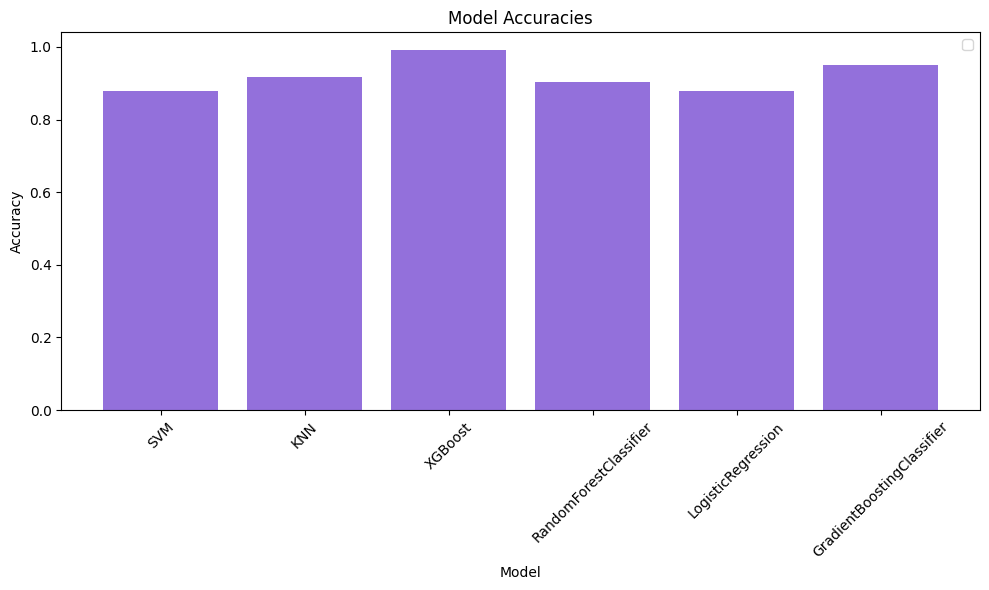

In [36]:
import matplotlib.pyplot as plt



# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_model_scores['Model'], df_model_scores['Accuracy'], color='mediumpurple')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')


# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.legend(loc="upper right", fontsize=10)

# Show plot
plt.tight_layout()
plt.show()